# Solemne 3 y Recuperativa
### LSTM para Estacion Meteorologica

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data.csv')
df

,fecha,gas,temperatura,humedad,luminosidad,presion
0,1731686936454,592,28,47,485,94.76
1,1731686997476,765,28,46,529,94.76
2,1731687058489,695,28,46,508,94.76
3,1731687119511,535,28,46,510,94.77
4,1731687180982,528,28,46,510,94.76
...,...,...,...,...,...,...
8938,1732232384753,2905,27,41,307,95.11
8939,1732232445443,3103,27,41,310,95.11
8940,1732232506926,2868,27,41,311,95.11
8941,1732232568043,3055,27,41,330,95.11


# Transformar fechas Unix a datetime

In [3]:
df["fecha"] = pd.to_datetime(df["fecha"],unit="ms")
start_date = df["fecha"][0].replace(second=0,microsecond=0)
df["fecha"] = pd.date_range(start=start_date,periods=len(df),freq='T')

# Extraer componentes temporales

#df['dayofweek'] = df['fecha'].dt.dayofweek  # 0 = lunes, 6 = domingo
#df['month'] = df['fecha'].dt.month
#df['day'] = df['fecha'].dt.day

df

C:\Users\Nico\AppData\Local\Temp\ipykernel_19704\3326514680.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df["fecha"] = pd.date_range(start=start_date,periods=len(df),freq='T')


,fecha,gas,temperatura,humedad,luminosidad,presion
0,2024-11-15 16:08:00,592,28,47,485,94.76
1,2024-11-15 16:09:00,765,28,46,529,94.76
2,2024-11-15 16:10:00,695,28,46,508,94.76
3,2024-11-15 16:11:00,535,28,46,510,94.77
4,2024-11-15 16:12:00,528,28,46,510,94.76
...,...,...,...,...,...,...
8938,2024-11-21 21:06:00,2905,27,41,307,95.11
8939,2024-11-21 21:07:00,3103,27,41,310,95.11
8940,2024-11-21 21:08:00,2868,27,41,311,95.11
8941,2024-11-21 21:09:00,3055,27,41,330,95.11


In [4]:
df['hora'] = df['fecha'].dt.hour
df

,fecha,gas,temperatura,humedad,luminosidad,presion,hora
0,2024-11-15 16:08:00,592,28,47,485,94.76,16
1,2024-11-15 16:09:00,765,28,46,529,94.76,16
2,2024-11-15 16:10:00,695,28,46,508,94.76,16
3,2024-11-15 16:11:00,535,28,46,510,94.77,16
4,2024-11-15 16:12:00,528,28,46,510,94.76,16
...,...,...,...,...,...,...,...
8938,2024-11-21 21:06:00,2905,27,41,307,95.11,21
8939,2024-11-21 21:07:00,3103,27,41,310,95.11,21
8940,2024-11-21 21:08:00,2868,27,41,311,95.11,21
8941,2024-11-21 21:09:00,3055,27,41,330,95.11,21


# Promediar 60 Min

In [5]:
# Establecer timestamp como índice
df.set_index('fecha', inplace=True)

In [6]:
df

,gas,temperatura,humedad,luminosidad,presion,hora
fecha,,,,,,
2024-11-15 16:08:00,592,28,47,485,94.76,16
2024-11-15 16:09:00,765,28,46,529,94.76,16
2024-11-15 16:10:00,695,28,46,508,94.76,16
2024-11-15 16:11:00,535,28,46,510,94.77,16
2024-11-15 16:12:00,528,28,46,510,94.76,16
...,...,...,...,...,...,...
2024-11-21 21:06:00,2905,27,41,307,95.11,21
2024-11-21 21:07:00,3103,27,41,310,95.11,21
2024-11-21 21:08:00,2868,27,41,311,95.11,21


In [7]:
df_resampled = df.resample('60T').mean()
df_resampled

C:\Users\Nico\AppData\Local\Temp\ipykernel_19704\3362586963.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.resample('60T').mean()


,gas,temperatura,humedad,luminosidad,presion,hora
fecha,,,,,,
2024-11-15 16:00:00,561.057692,28.000000,44.923077,544.000000,94.758654,16.0
2024-11-15 17:00:00,482.183333,28.250000,43.050000,635.383333,94.739000,17.0
2024-11-15 18:00:00,441.183333,29.000000,41.566667,675.816667,94.719833,18.0
2024-11-15 19:00:00,419.400000,29.000000,40.683333,621.833333,94.686000,19.0
2024-11-15 20:00:00,396.983333,28.966667,40.783333,482.083333,94.658667,20.0
...,...,...,...,...,...,...
2024-11-21 17:00:00,900.316667,28.083333,40.016667,754.400000,95.003333,17.0
2024-11-21 18:00:00,937.533333,28.250000,42.566667,337.750000,95.018500,18.0
2024-11-21 19:00:00,933.683333,28.166667,40.450000,387.433333,95.056167,19.0


# Fechas Ciclicas

In [8]:
df = df_resampled
# Codificar la hora del día de manera cíclica
df['hora_sin'] = np.sin(2 * np.pi * df['hora'] / 24)  # 24 horas en un día
df['hora_cos'] = np.cos(2 * np.pi * df['hora'] / 24)

# Codificar el día de la semana de manera cíclica
# df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)  # 7 días en una semana
# df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

# # Codificar el mes del año de manera cíclica
# df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)  # 12 meses en un año
# df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Ahora df contiene las variables cíclicas
print(df)


                             gas  temperatura    humedad  luminosidad  \
fecha                                                                   
2024-11-15 16:00:00   561.057692    28.000000  44.923077   544.000000   
2024-11-15 17:00:00   482.183333    28.250000  43.050000   635.383333   
2024-11-15 18:00:00   441.183333    29.000000  41.566667   675.816667   
2024-11-15 19:00:00   419.400000    29.000000  40.683333   621.833333   
2024-11-15 20:00:00   396.983333    28.966667  40.783333   482.083333   
...                          ...          ...        ...          ...   
2024-11-21 17:00:00   900.316667    28.083333  40.016667   754.400000   
2024-11-21 18:00:00   937.533333    28.250000  42.566667   337.750000   
2024-11-21 19:00:00   933.683333    28.166667  40.450000   387.433333   
2024-11-21 20:00:00  1439.850000    27.983333  39.416667   401.966667   
2024-11-21 21:00:00  2929.818182    27.454545  42.272727   313.000000   

                       presion  hora  hora_sin    

In [9]:
#Revisar NULOS
df.isnull().sum()

gas            0
temperatura    0
humedad        0
luminosidad    0
presion        0
hora           0
hora_sin       0
hora_cos       0
dtype: int64

In [10]:
#Cantidad de datos
df.count()

gas            150
temperatura    150
humedad        150
luminosidad    150
presion        150
hora           150
hora_sin       150
hora_cos       150
dtype: int64

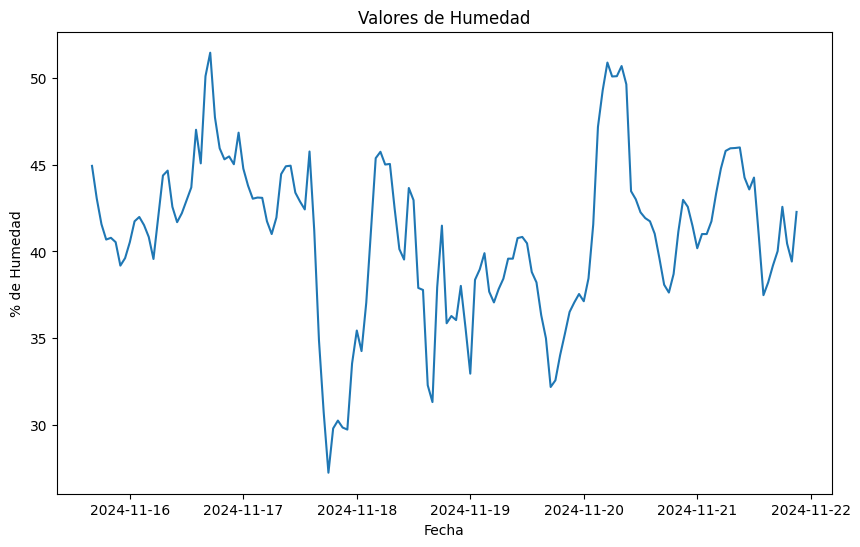

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df["humedad"])
plt.xlabel("Fecha")
plt.ylabel("% de Humedad")
plt.title("Valores de Humedad")
plt.show()

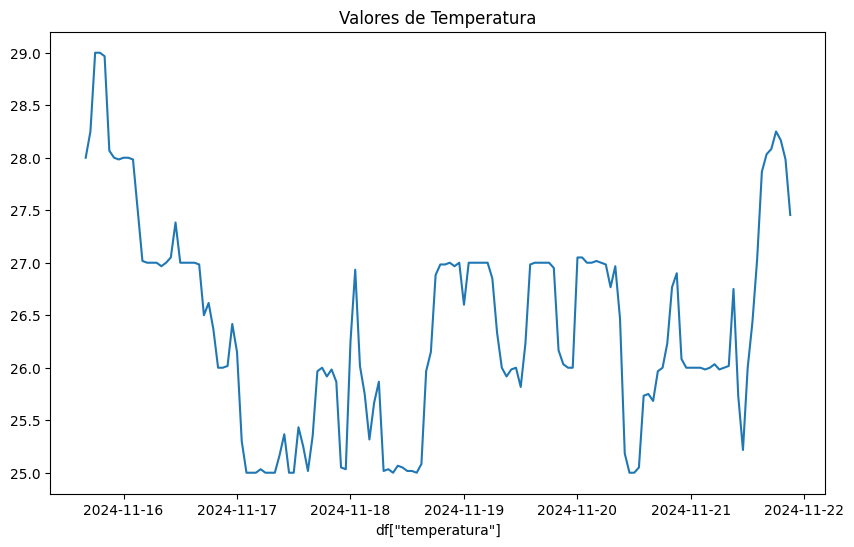

In [12]:
plt.figure(figsize=(10,6))
plt.plot(df["temperatura"])
plt.xlabel("df[\"temperatura\"]")
plt.title("Valores de Temperatura")
plt.show()

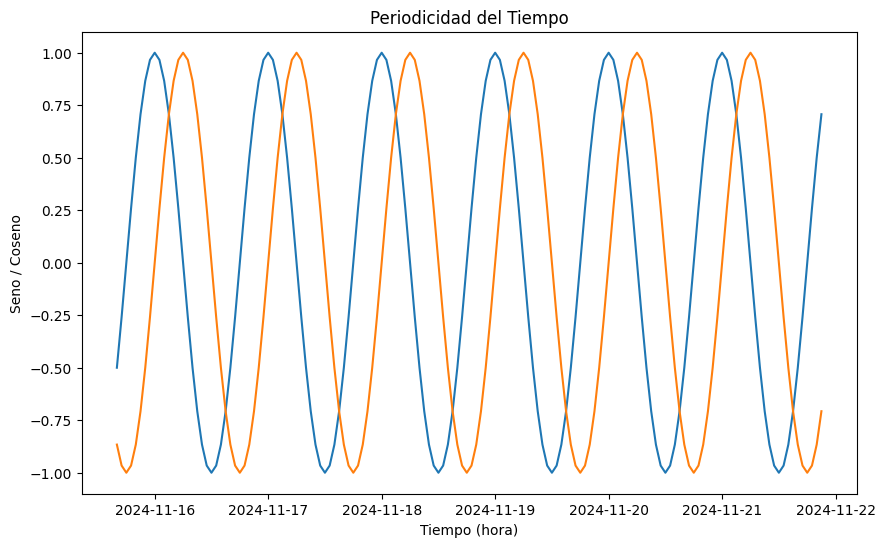

In [13]:
#Ciclo dia y noche
plt.figure(figsize=(10,6))
plt.plot(df["hora_cos"])
plt.plot(df["hora_sin"])
plt.xlabel("Tiempo (hora)")
plt.ylabel("Seno / Coseno")
plt.title("Periodicidad del Tiempo")
plt.show()

# PreProcesado

* Limpiar y Generar indice

In [14]:
df.columns

Index(['gas', 'temperatura', 'humedad', 'luminosidad', 'presion', 'hora',
       'hora_sin', 'hora_cos'],
      dtype='object')

In [15]:
df_clean = df.drop(columns=["hora"])
df_clean = df_clean.reset_index(drop=True)
df_clean

,gas,temperatura,humedad,luminosidad,presion,hora_sin,hora_cos
0,561.057692,28.000000,44.923077,544.000000,94.758654,-0.866025,-5.000000e-01
1,482.183333,28.250000,43.050000,635.383333,94.739000,-0.965926,-2.588190e-01
2,441.183333,29.000000,41.566667,675.816667,94.719833,-1.000000,-1.836970e-16
3,419.400000,29.000000,40.683333,621.833333,94.686000,-0.965926,2.588190e-01
4,396.983333,28.966667,40.783333,482.083333,94.658667,-0.866025,5.000000e-01
...,...,...,...,...,...,...,...
145,900.316667,28.083333,40.016667,754.400000,95.003333,-0.965926,-2.588190e-01
146,937.533333,28.250000,42.566667,337.750000,95.018500,-1.000000,-1.836970e-16
147,933.683333,28.166667,40.450000,387.433333,95.056167,-0.965926,2.588190e-01
148,1439.850000,27.983333,39.416667,401.966667,95.109000,-0.866025,5.000000e-01


* Escalar datos

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
df_scaled = scaler.fit_transform(df_clean.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=list(df_clean.columns))

target_scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled[['temperatura', 'humedad']] = target_scaler.fit_transform(df_clean[['temperatura', 'humedad']].to_numpy())
df_scaled = df_scaled.astype(float)

df_scaled

,gas,temperatura,humedad,luminosidad,presion,hora_sin,hora_cos
0,-0.849979,0.750000,0.730610,0.106384,-0.600449,-0.866025,-5.000000e-01
1,-0.911579,0.812500,0.653103,0.292239,-0.678595,-0.965926,-2.588190e-01
2,-0.943599,1.000000,0.591724,0.374472,-0.754805,-1.000000,-1.836970e-16
3,-0.960612,1.000000,0.555172,0.264681,-0.889331,-0.965926,2.588190e-01
4,-0.978119,0.991667,0.559310,-0.019541,-0.998012,-0.866025,5.000000e-01
...,...,...,...,...,...,...,...
145,-0.585021,0.770833,0.527586,0.534295,0.372432,-0.965926,-2.588190e-01
146,-0.555955,0.812500,0.633103,-0.313086,0.432737,-1.000000,-1.836970e-16
147,-0.558962,0.791667,0.545517,-0.212040,0.582505,-0.965926,2.588190e-01
148,-0.163651,0.745833,0.502759,-0.182482,0.792578,-0.866025,5.000000e-01


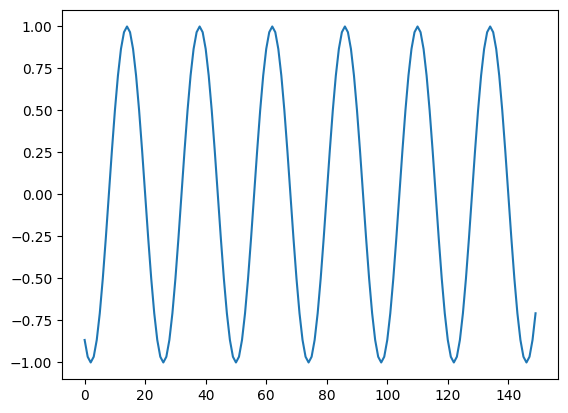

In [17]:
plt.plot(df_scaled["hora_sin"])

# Exportar Scaler para denormalizacion a futuro

In [18]:
import joblib
joblib.dump(target_scaler,'../out/target-scaler.gz')

['../out/target-scaler.gz']

* Preparación de Datos

In [19]:
def split_series(series, n_past, n_future,columns):
    """
    Splits a time series into past and future windows.

    Args:
        series (numpy.ndarray): The time series to be split.
        n_past (int): The number of past observations in each window.
        n_future (int): The number of future observations in each window.

    Returns:
        tuple: A tuple of numpy arrays containing the past and future windows.
    """
    X, y = [], []  # initialize empty lists to store past and future windows
    for window_start in range(len(series)):
        past_end = window_start + n_past  # end index of past window
        future_end = past_end + n_future  # end index of future window
        if future_end > len(series):  # if future window extends beyond series, break loop
            break
        #print(window_start,past_end,future_end)

        past, future = series[window_start:past_end, :], series[past_end:future_end, :]  # slice past and future windows
        future = future[:][:,0:2] #Solamente temperatura y humedad
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)  # convert lists to numpy arrays and return as tuple



* Separación de datos

In [20]:
split_index = round(len(df.index) * 0.8) # 75%/25% train/test split
train, test = df_scaled[1:split_index], df_scaled[split_index:]

In [21]:
n_past = 3# 60 Minutos
n_future = 5 # 5 Horas 300 minutos
n_features = len(df_scaled.columns) # 5 Variables
n_prediction_vars = 2 # Temperatura y Humedad

In [22]:
X_train, y_train = split_series(train.values,n_past, n_future,columns=("temperatura","humedad"))

In [23]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_prediction_vars))
X_test, y_test = split_series(test.values,n_past, n_future,columns=("temperatura","humedad"))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_prediction_vars))

In [24]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(112, 3, 7) (112, 5, 2)
(23, 3, 7) (23, 5, 2)


# Implementación de Modelo

In [25]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Input, Reshape


In [26]:
#definir el modelo

inputs = Input(shape=(n_past, n_features),batch_size=1)

x1 = LSTM(20,activation='relu')(inputs) # 50 LSTM
x2 = Dense(n_future * n_prediction_vars)(x1)
outputs = Reshape ((n_future,n_prediction_vars))(x2) # 5 horas 6 variables

model = keras.Model(inputs=inputs, outputs=outputs)

#Crear el modelo
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()


#model = Sequential()
#model.add(LSTM(200, activation='relu', input_shape=(timesteps,num_features),unroll=False))
#model.add(Dropout(0.2))
#model.add(Dense(2))
#model.compile(optimizer='adam', loss='mse', metrics=["mae"])
#model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (1, 3, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (1, 20)                │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1, 10)                │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (1, 5, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,450 (9.57 KB)

 Trainable params: 2,450 (9.57 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping para monitorear la validación y detener el entrenamiento si no mejora
early_stop = EarlyStopping(monitor='mae', 
                           patience=5, 
                           restore_best_weights=True)


In [28]:
history = model.fit(X_train, y_train, epochs=2000,callbacks=early_stop)

Epoch 1/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2727 - mae: 0.4529
Epoch 2/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2607 - mae: 0.4426 
Epoch 3/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2478 - mae: 0.4306 
Epoch 4/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2287 - mae: 0.4138 
Epoch 5/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2315 - mae: 0.4166 
Epoch 6/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2232 - mae: 0.4104 
Epoch 7/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2092 - mae: 0.3958 
Epoch 8/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1983 - mae: 0.3814 
Epoch 9/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1886 - mae: 0.3705 
Epoch 10/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1725 - mae: 0.3503 
Epoch 11/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1602 - mae: 0.3348 
Epoch 12/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1478 - mae: 0.3210 
Epoch 13/2000
4/4 ━━━━━━━━━━━━━━━━━━━

# Desempeño del modelo

In [29]:
history.history.keys()

dict_keys(['loss', 'mae'])

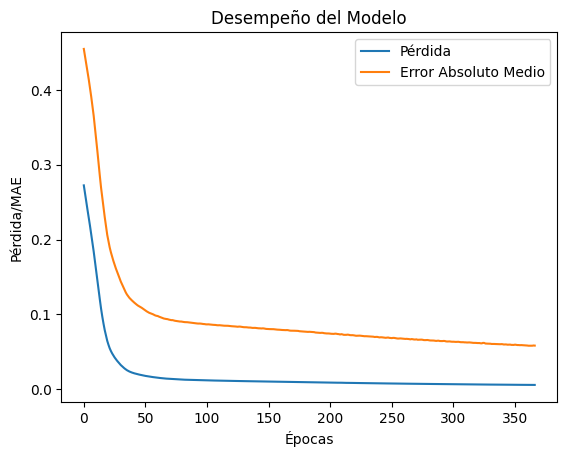

In [30]:
plt.plot(history.history["loss"],label="Pérdida")
plt.plot(history.history["mae"] ,label="Error Absoluto Medio")
plt.xlabel("Épocas")
plt.ylabel("Pérdida/MAE")
plt.title("Desempeño del Modelo")
plt.legend(loc="upper right")
plt.show()

In [31]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [32]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_pred.shape)
print(y_test.shape)

(23, 3, 7)
(112, 3, 7)
(112, 5, 2)
(23, 5, 2)
(23, 5, 2)


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Flatten y_true and y_pred for easier comparison across all timesteps
y_true_temp = y_test[:, :, 0].flatten()  # True values for temperature
y_pred_temp = y_pred[:, :, 0].flatten()  # Predicted values for temperature

y_true_humidity = y_test[:, :, 1].flatten()  # True values for humidity
y_pred_humidity = y_pred[:, :, 1].flatten()  # Predicted values for humidity

# RMSE for temperature and humidity
rmse_temp = np.sqrt(mean_squared_error(y_true_temp, y_pred_temp))
rmse_humidity = np.sqrt(mean_squared_error(y_true_humidity, y_pred_humidity))

# MAE for temperature and humidity
mae_temp = mean_absolute_error(y_true_temp, y_pred_temp)
mae_humidity = mean_absolute_error(y_true_humidity, y_pred_humidity)

# R² Score for temperature and humidity
r2_temp = r2_score(y_true_temp, y_pred_temp)
r2_humidity = r2_score(y_true_humidity, y_pred_humidity)

print(f"Temperature Metrics:\n RMSE: {rmse_temp}, MAE: {mae_temp}, R²: {r2_temp}")
print(f"Humidity Metrics:\n RMSE: {rmse_humidity}, MAE: {mae_humidity}, R²: {r2_humidity}")


Temperature Metrics:
 RMSE: 0.23838524522643437, MAE: 0.1601753291098493, R²: -0.25059352251010125
Humidity Metrics:
 RMSE: 0.2811866649212829, MAE: 0.2301128330111151, R²: -0.6650036298806055


# Grafico con predicciones de otro color

In [ ]:
# n_past = 60
# n_future = 300
# tiempo = []

# print(len(df_scaled["fecha_unix"]))
# for i in range(len(df_scaled["fecha_unix"].values) // n_past):
#     init = n_past * i
#     final = init + n_future
#     plt.plot(df_scaled["fecha_unix"][n_past * i:final:])

# for window_start in range(len(df_scaled) // n_past):
#     past_end = window_start * n_past  # end index of past window
#     future_end = past_end + n_future  # end index of future window
#     if future_end > len(df_scaled):  # if future window extends beyond series, break loop
#             break
#     print("Entrenamineto",df_scaled[past_end:past_end+n_past])
#     print("Prueba",df_scaled[past_end:past_end+n_past])

#     print(window_start,past_end,future_end)

#     break

In [ ]:
# plt.plot(range(1, 6), temperature_predictions[0], label="Predicción Temperatura (1 hora)")
# plt.plot(range(1, 6), humidity_predictions[0], label="Predicción Humedad (1 hora)")
# plt.xlabel("Tiempo (horas)")
# plt.ylabel("Valor")
# plt.title("Predicción Temperatura y Humedad a Futuro (1 hora por paso)")
# plt.legend()
# plt.show()


In [ ]:
# d = {
#     'Predicted_Temp': predicted_values[:, 0],
#     'Predicted_Humidity': predicted_values[:, 1],
#     'Actual_Temp': y_test[:, 0],
#     'Actual_Humidity': y_test[:, 1],
# }

# d = pd.DataFrame(d)
# d.index = df.index[-len(y_test):]  # Assigning the correct date index

# fig, ax = plt.subplots(figsize=(10, 6))
# #  highlight the  forecast
# highlight_start = int(len(d) * 0.9)
# highlight_end = len(d) - 1  # Adjusted to stay within bounds
# # Plot the actual values
# plt.plot(d[['Actual_Temp', 'Actual_Humidity']][:highlight_start], label=['Temperatura Real', 'Humidedad Real'])

# # Plot predicted values with a dashed line
# plt.plot(d[['Predicted_Temp', 'Predicted_Humidity']], label=['Predicción de Temperatura', 'Predicción de Humedad'], linestyle='--')

# # Highlight the forecasted portion with a different color
# plt.axvspan(d.index[highlight_start], d.index[highlight_end], facecolor='lightgreen', alpha=0.5, label='Valores Futuros')

# plt.title('Pronóstico de series temporales multivariadas utilizando LSTM')
# plt.xlabel('Fechas')
# plt.ylabel('Valores')
# ax.legend()
# plt.show()

# Denormalización Algebraica

In [49]:
primera_muestra = y_pred[0] #los datos de las horas
primera_muestra = target_scaler.inverse_transform(primera_muestra)
primera_real = y_test[0]
primera_real = target_scaler.inverse_transform(primera_real)

In [35]:
primera_muestra

array([[22.514305, 33.42878 ],
       [22.45815 , 34.15127 ],
       [22.463144, 35.71245 ],
       [22.266388, 34.65879 ],
       [22.425697, 34.11571 ]], dtype=float32)

In [50]:
primera_real

array([[22.33762799, 34.71805556],
       [23.32235253, 37.94027778],
       [22.9760094 , 38.74583333],
       [22.77633623, 33.81180556],
       [22.57182093, 33.30833333]])

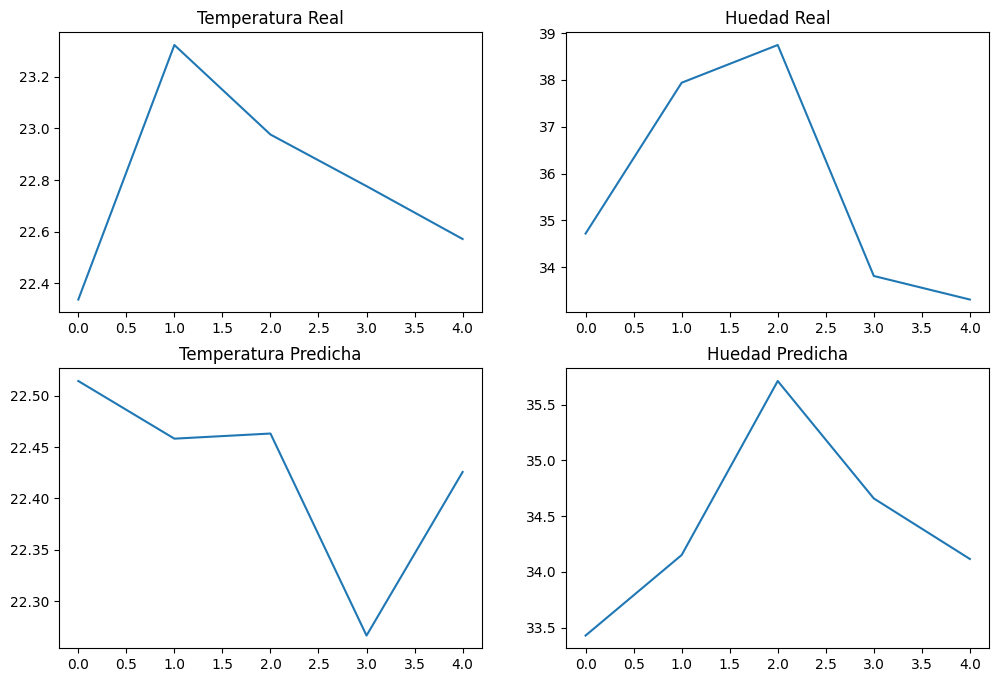

In [ ]:
fig,axs = plt.subplots(2,2,figsize=(12,8))
axs[0][0].set_title("Temperatura Real")
axs[0][0].plot(primera_real[:,0])
axs[0][1].set_title("Humedad Real")
axs[0][1].plot(primera_real[:,1])

axs[1][0].set_title("Temperatura Predicha")
axs[1][0].plot(primera_muestra[:,0])
axs[1][1].set_title("Humedad Predicha")
axs[1][1].plot(primera_muestra[:,1])

In [36]:
"""
res*diff(range(Ali))+min(Ali)? That's not really a coding question, though, ... more algebra. 

It is the inverse of the transformation you applied (Ali - min(Ali))/diff(range(Ali)), unless I made an error. You may have to save ranges and mins for each row or column or whatever you're normalizing here. – 
Frank
Commented Sep 19, 2013 at 18:58 ""
"
"""


predicted_values_inverse = target_scaler.inverse_transform(y_pred)
y_test_inverse = target_scaler.inverse_transform(y_test)

dinv = {
    'Predicted_Temp': predicted_values_inverse[:, 0],
    'Predicted_Humidity': predicted_values_inverse[:, 1],
    'Actual_Temp': y_test_inverse[:, 0],
    'Actual_Humidity': y_test_inverse[:, 1],
}

dinv = pd.DataFrame(dinv)
dinv.index = df.index[-len(y_test_inverse):]  # Assigning the correct date index

ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dinv["Actual_Humidity"])
plt.plot(dinv["Predicted_Humidity"])
plt.xlabel("Fecha")
plt.ylabel("Humedad")
plt.title("Valores de Humedad")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dinv["Actual_Temp"])
plt.plot(dinv["Predicted_Temp"])
plt.xlabel("Humedad Original")
plt.title("Valores de Humedad")
plt.show()

# Exportar Modelo Nivel Alto

In [136]:
H_MODEL_PATH = "../out/HIGH_LEVEL_MODEL/model.keras"
L_MODEL_PATH = "../out/LOW_LEVEL_MODEL/"
LITE_MODEL_PATH = "../out/LITE_MODEL"

In [137]:
model.save(H_MODEL_PATH)

# Cargar Modelo

In [138]:
import tensorflow as tf
modelo_cargado = tf.keras.models.load_model(H_MODEL_PATH)

In [139]:
modelo_cargado.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[[-0.6709148 ,  0.2719548 ],
        [-0.67588186,  0.2862095 ],
        [-0.69946885,  0.30320823],
        [-0.7027476 ,  0.2854141 ],
        [-0.6934884 ,  0.22735602]],

       [[-0.6545412 ,  0.31332684],
        [-0.6462947 ,  0.3002553 ],
        [-0.67585146,  0.3182807 ],
        [-0.6611027 ,  0.29093456],
        [-0.64650077,  0.2191565 ]],

       [[-0.59852403,  0.3538183 ],
        [-0.57375586,  0.3269506 ],
        [-0.60654044,  0.31969994],
        [-0.58500147,  0.2880906 ],
        [-0.57147866,  0.21910667]],

       [[-0.56190705,  0.38606322],
        [-0.51819146,  0.34416154],
        [-0.5472538 ,  0.31802654],
        [-0.5227578 ,  0.27809626],
        [-0.5323961 ,  0.22966358]],

       [[-0.5580938 ,  0.30495626],
        [-0.5335944 ,  0.24661766],
        [-0.5585365 ,  0.1980809 ],
        [-0.55947435,  0.1679086 ],
        [-0.59509486,  0.15133224]],

       [[-0.5809557 ,  0.24045846],
        [-0.6296088 ,  0.1270948 ],
        [-0.647383

# Exportar Modelo Nivel Bajo

In [140]:
tf.saved_model.save(model,L_MODEL_PATH)

INFO:tensorflow:Assets written to: ../out/LOW_LEVEL_MODEL/assets


INFO:tensorflow:Assets written to: ../out/LOW_LEVEL_MODEL/assets


# Convertir a modelo Lite para Microcontroladores

In [142]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Optionally, apply optimizations (e.g., quantization)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Apply optimizations like quantization
# Convert the model
tflite_model = converter.convert()

# Save the converted model
with open(f'{LITE_MODEL_PATH}/model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Nico\AppData\Local\Temp\tmpi9fmjg7a\assets


INFO:tensorflow:Assets written to: C:\Users\Nico\AppData\Local\Temp\tmpi9fmjg7a\assets


Saved artifact at 'C:\Users\Nico\AppData\Local\Temp\tmpi9fmjg7a'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 3, 7), dtype=tf.float32, name='keras_tensor_91')
Output Type:
  TensorSpec(shape=(1, 5, 2), dtype=tf.float32, name=None)
Captures:
  1887883939088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1887883936784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1887883941008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1887883936016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1887883940240: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [143]:
converter = tf.lite.TFLiteConverter.from_saved_model(L_MODEL_PATH)

# Optionally, apply optimizations (e.g., quantization)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Apply optimizations like quantization
# Convert the model
tflite_model = converter.convert()

# Save the converted model
with open(f'{LITE_MODEL_PATH}/model.tflite', 'wb') as f:
    f.write(tflite_model)

# Exportar X_test para probar en microprocesador

In [144]:
np.save('../out/X-test.npy',X_test)

In [394]:
predictx = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [395]:
predictx[0]

array([[-0.49935558,  0.10314927],
       [-0.57203156,  0.13618048],
       [-0.57611376,  0.17339596],
       [-0.5795995 ,  0.21213916],
       [-0.5691922 ,  0.24707288]], dtype=float32)

In [151]:
output = np.load("output.npy")
output

array([[22.316341, 33.83891 ],
       [22.296473, 34.183395],
       [22.202126, 34.5942  ],
       [22.18901 , 34.164173],
       [22.226046, 32.7611  ]], dtype=float32)

In [154]:
target_scaler.inverse_transform(y_pred[0])

array([[22.316341, 33.83891 ],
       [22.296473, 34.183395],
       [22.202126, 34.5942  ],
       [22.18901 , 34.164173],
       [22.226046, 32.7611  ]], dtype=float32)